In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Загрузка и преобработка данных

In [2]:
path = 'D:\\Leon Projects\\Python\\Poisk strukturi dannih 3 kurs\\Week1\\Task\\'

In [3]:
#Читаем строки, разбиваем на эелементы и приобразовуем в массив
lines = []
with open(path + 'checkins.dat','r') as open_file:
    for line in open_file:
        l = np.array([x.strip() for x in line.split('|')])
        lines.append(l)

In [4]:
#Убераем строку с разделяющей линией
del(lines[1])
lines

[array(['id', 'user_id', 'venue_id', 'latitude', 'longitude', 'created_at'], 
       dtype='|S10'),
 array(['984301', '2041916', '5222', '', '', '2012-04-21 17:39:01'], 
       dtype='|S19'),
 array(['984222', '15824', '5222', '38.8951118', '-77.0363658',
        '2012-04-21 17:43:47'], 
       dtype='|S19'),
 array(['984315', '1764391', '5222', '', '', '2012-04-21 17:37:18'], 
       dtype='|S19'),
 array(['984234', '44652', '5222', '33.800745', '-84.41052',
        '2012-04-21 17:43:43'], 
       dtype='|S19'),
 array(['984249', '2146840', '5222', '', '', '2012-04-21 17:42:58'], 
       dtype='|S19'),
 array(['984268', '2146843', '5222', '', '', '2012-04-21 17:42:38'], 
       dtype='|S19'),
 array(['984281', '2146846', '5222', '', '', '2012-04-21 17:39:40'], 
       dtype='|S19'),
 array(['984291', '105054', '5222', '45.5234515', '-122.6762071',
        '2012-04-21 17:39:22'], 
       dtype='|S19'),
 array(['6651', '1338710', '219703', '', '', '2011-12-08 23:11:23'], 
       dtype='

In [5]:
#Выделение строки с названиями столбцов
columns = lines[0]
columns

array(['id', 'user_id', 'venue_id', 'latitude', 'longitude', 'created_at'], 
      dtype='|S10')

In [6]:
del(lines[0])

In [7]:
data = pd.DataFrame(lines, columns=columns)

In [8]:
data.head()

,id,user_id,venue_id,latitude,longitude,created_at
0,984301,2041916,5222,,,2012-04-21 17:39:01
1,984222,15824,5222,38.8951118,-77.0363658,2012-04-21 17:43:47
2,984315,1764391,5222,,,2012-04-21 17:37:18
3,984234,44652,5222,33.800745,-84.41052,2012-04-21 17:43:43
4,984249,2146840,5222,,,2012-04-21 17:42:58


In [9]:
#Заменям пустые ячейки на NAN
data.replace('',np.nan,inplace=True)
data.head()

,id,user_id,venue_id,latitude,longitude,created_at
0,984301,2041916,5222,NaN,NaN,2012-04-21 17:39:01
1,984222,15824,5222,38.8951118,-77.0363658,2012-04-21 17:43:47
2,984315,1764391,5222,NaN,NaN,2012-04-21 17:37:18
3,984234,44652,5222,33.800745,-84.41052,2012-04-21 17:43:43
4,984249,2146840,5222,NaN,NaN,2012-04-21 17:42:58


In [10]:
#Теперь можно удалить строки с ячейками NAN
data.dropna(inplace=True)
data.head()

,id,user_id,venue_id,latitude,longitude,created_at
1,984222,15824,5222,38.8951118,-77.0363658,2012-04-21 17:43:47
3,984234,44652,5222,33.800745,-84.41052,2012-04-21 17:43:43
7,984291,105054,5222,45.5234515,-122.6762071,2012-04-21 17:39:22
9,984318,2146539,5222,40.764462,-111.904565,2012-04-21 17:35:46
10,984232,93870,380645,33.4483771,-112.0740373,2012-04-21 17:38:18


In [11]:
#Приобразуем колонку с датой в формат даты
data.created_at = data.created_at.apply(pd.to_datetime)
data.head()

,id,user_id,venue_id,latitude,longitude,created_at
1,984222,15824,5222,38.8951118,-77.0363658,2012-04-21 17:43:47
3,984234,44652,5222,33.800745,-84.41052,2012-04-21 17:43:43
7,984291,105054,5222,45.5234515,-122.6762071,2012-04-21 17:39:22
9,984318,2146539,5222,40.764462,-111.904565,2012-04-21 17:35:46
10,984232,93870,380645,33.4483771,-112.0740373,2012-04-21 17:38:18


In [12]:
data.shape

(396634, 6)

### Кластеризация

In [13]:
from sklearn.cluster import MeanShift

In [14]:
cluster_meanshift = MeanShift(bandwidth=0.1)

In [17]:
cluster_meanshift.fit(data[:100000].loc[:,['latitude','longitude']])

MeanShift(bandwidth=0.1, bin_seeding=False, cluster_all=True, min_bin_freq=1,
     n_jobs=1, seeds=None)

In [18]:
pred = cluster_meanshift.predict(data[:100000].loc[:,['latitude','longitude']])

In [21]:
arr2 = np.unique(pred)

In [34]:
sums = [np.sum(pred == x) for x in arr2]

In [37]:
sorted_sums = sorted(sums,reverse=True)
sorted_sums

[12506,
 4692,
 3994,
 3526,
 3363,
 2409,
 2297,
 1601,
 1526,
 1378,
 1298,
 1081,
 1007,
 1006,
 907,
 870,
 868,
 808,
 807,
 754,
 747,
 722,
 714,
 679,
 656,
 645,
 612,
 594,
 580,
 577,
 564,
 539,
 502,
 452,
 449,
 431,
 410,
 400,
 388,
 384,
 369,
 367,
 355,
 347,
 345,
 342,
 336,
 316,
 314,
 314,
 293,
 291,
 281,
 273,
 271,
 263,
 258,
 254,
 246,
 243,
 229,
 220,
 203,
 199,
 197,
 196,
 193,
 192,
 191,
 190,
 189,
 187,
 186,
 182,
 178,
 173,
 169,
 164,
 162,
 157,
 155,
 155,
 153,
 152,
 142,
 141,
 138,
 137,
 135,
 135,
 135,
 134,
 134,
 133,
 132,
 131,
 130,
 126,
 126,
 122,
 121,
 120,
 119,
 118,
 117,
 116,
 114,
 114,
 112,
 110,
 110,
 110,
 109,
 106,
 104,
 103,
 103,
 102,
 101,
 101,
 100,
 100,
 99,
 99,
 99,
 99,
 98,
 98,
 97,
 97,
 95,
 95,
 95,
 95,
 92,
 91,
 91,
 87,
 85,
 85,
 84,
 84,
 84,
 83,
 82,
 81,
 80,
 79,
 79,
 79,
 79,
 78,
 78,
 78,
 78,
 77,
 76,
 76,
 76,
 74,
 74,
 74,
 74,
 74,
 74,
 73,
 72,
 71,
 71,
 69,
 69,
 69,
 68

In [41]:
sorted_clust = [sums.index(x) for x in sorted_sums[:20]]
sorted_clust

[0, 1, 2, 4, 3, 5, 6, 7, 8, 9, 10, 11, 13, 12, 31, 16, 15, 18, 19, 22]

In [46]:
clust = cluster_meanshift.cluster_centers_[sorted_clust]

In [62]:
np.savetxt(path+'clusters.txt',clust.round(6),delimiter=',',fmt='%.6f')

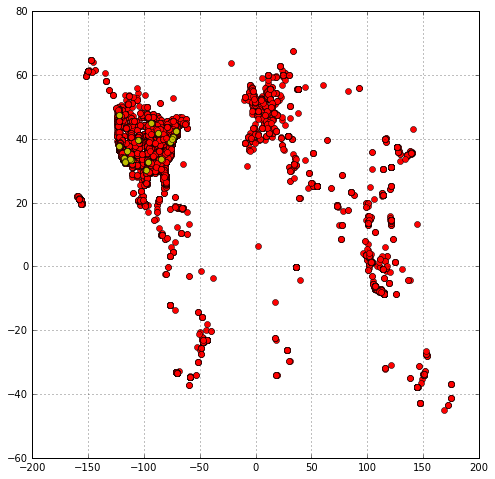

In [51]:
plt.figure(figsize=(8,8))
plt.grid(True)
plt.plot(data.longitude[:100000],data.latitude[:100000],'or')
plt.plot(clust[:,1],clust[:,0],'oy')
plt.show()

In [63]:
offices= np.array([[33.751277, -118.188740],
                   [25.867736, -80.324116],
                   [51.503016, -0.075479],
                   [52.378894, 4.885084],
                   [39.366487, 117.036146],
                   [-33.868457, 151.205134]
                  ])

In [72]:
opt_clust = cluster_meanshift.cluster_centers_[np.array(sums) > 15]
opt_clust

array([[  40.7177164 ,  -73.99183542],
       [  33.44943805, -112.00213969],
       [  33.44638027, -111.90188756],
       ..., 
       [  41.61853175,  -88.44556818],
       [  38.65877915,  -76.8856871 ],
       [  39.2494686 ,  -77.1821271 ]])

In [73]:
from scipy.spatial import distance,distance_matrix

In [78]:
dists = distance_matrix(opt_clust,offices,p=2)

In [107]:
ind_min_clust = [np.min(dists,axis=1).tolist().index(x) for x in sorted(np.min(dists,axis=1))][:20]

In [119]:
f = open(path + 'ans.txt','w')
f.write('%.6f %.6f' % (opt_clust[ind_min_clust[0]][0],opt_clust[ind_min_clust[0]][1] ))
f.close()